In [1]:
import pandas as pd

In [2]:
df = pd.read_json('esg_data/esg_data.json')

In [3]:
df.head()

,esg,esg_industry,industry,name,ticker
0,[],[],Mining (except Oil & Gas),20-Microns-Ltd,20MICRONS
1,"[[1622505600000, 14.44], [1625097600000, 14.46...","[[1622505600000, 13.83], [1625097600000, 12.9]...",Containers & Packaging Manufacturing,3M-INDIA-LIMITED,3MINDIA
2,"[[1633046400000, 36.21], [1635724800000, 35.68...","[[1633046400000, 19.94], [1635724800000, 20.25...",Brokerage & Capital Markets,5paisa-Capital-Limited,5PAISA
3,[],[],Brokerage & Capital Markets,A-K-CAPITAL-SERVICES-LIMITED,530499
4,[],[],"Architectural, Engineering, & Related Services",A2Z-MAINTENANCE-and-ENGINEERING-SERVICES-LIMITED,A2ZINFRA


In [4]:
# Drop the stocks that have no ESG data
df = df[df['esg'].str.len() > 0]
df.head()

,esg,esg_industry,industry,name,ticker
1,"[[1622505600000, 14.44], [1625097600000, 14.46...","[[1622505600000, 13.83], [1625097600000, 12.9]...",Containers & Packaging Manufacturing,3M-INDIA-LIMITED,3MINDIA
2,"[[1633046400000, 36.21], [1635724800000, 35.68...","[[1633046400000, 19.94], [1635724800000, 20.25...",Brokerage & Capital Markets,5paisa-Capital-Limited,5PAISA
5,"[[1622505600000, 16.98], [1625097600000, 17.08...","[[1622505600000, 26.05], [1625097600000, 26.42...",Health Care & Pharmaceuticals,Aarti-Drugs-Ltd,AARTIDRUGS
6,"[[1622505600000, 19.55], [1625097600000, 19.69...","[[1622505600000, 28.24], [1625097600000, 26.97...","Chemicals, Plastics & Rubber Products Mfg.",AARTI-INDUSTRIES-LTD,AARTIIND
8,"[[1625097600000, 52.96], [1627776000000, 69.18...","[[1625097600000, 66.0], [1627776000000, 73.21]...",Real Estate Financial Services,Aavas-Financiers-Ltd,AAVAS


In [59]:
df.shape

(593, 9)

In [60]:
# Check if all insdustries have esg data
(df['esg_industry'].str.len() > 0).sum() == df.shape[0]

True

In [61]:
with open('all_nse_stocks.txt', 'r') as f:
    all_stocks = f.read().splitlines()

print(len(all_stocks))


2137


In [62]:
# drop stocks that are not in the NSE list
df = df[df['ticker'].isin(all_stocks)]

In [63]:
# reindex the dataframe

df = df.reset_index(drop=True)

In [64]:
from datetime import datetime

def get_date(date: int) -> str:
    try:
        date = datetime.fromtimestamp(date/1000)
        return date.strftime("%Y-%m-%d")
    except TypeError:
        return str(date)

In [65]:
for i in range(len(df)):
    esg = df.at[i, 'esg']
    esg_industry = df.at[i, 'esg_industry']
    
    for j in range(len(esg_industry)):
        esg_industry[j][0] = get_date(esg_industry[j][0])
    
    for j in range(len(esg)):
        esg[j][0] = get_date(esg[j][0])
    
    df.at[i, 'esg'] = esg
    df.at[i, 'esg_industry'] = esg_industry


Analyzing the industry data

In [66]:
df[df['industry'] == 'Paper Products']

,esg,esg_industry,industry,name,ticker,growth_rate,industry_growth_rate,mean_esg,industry_mean_esg
334,"[[2021-06-01, 9.94], [2021-07-01, 10.01], [202...","[[2021-06-01, 11.76], [2021-07-01, 12.38], [20...",Paper Products,JK-PAPER-LIMITED,JKPAPER,0.080072,0.059971,28.167917,27.055


industry
Chemicals, Plastics & Rubber Products Mfg.              63
Construction Materials                                  34
Manufacturing                                           28
Pharmaceutical & Medicine Manufacturing                 24
Diversified Financial Services                          19
                                                        ..
Beer, Wine, & Distilled Alcoholic Bev. Wholesalers       1
Conglomerates, Tobacco, Hotels, Motels & Restaurants     1
Biotechnology, Health Care & Pharmaceuticals             1
General Merchandise Stores                               1
Accounting, Tax Prep., & Payroll Services                1
Name: count, Length: 107, dtype: int64
593


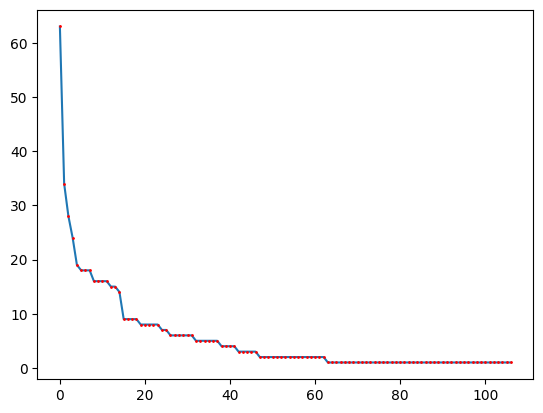

In [67]:
# number of companies in each industry
print (df['industry'].value_counts())
print (len(df))

# plot the number of companies in each industry
import matplotlib.pyplot as plt

plt.plot(df['industry'].value_counts().values)
plt.plot(df['industry'].value_counts().values, 'ro', markersize=1)

In [68]:
stockname = df['ticker'][0]
stockData = pd.read_json(f'data/{stockname}.json')
stockData.head()

,c,h,l,o,s,t,v
0,2757.50,2830.00,2725.05,2725.05,ok,1277942400,971
1,2763.60,2810.00,2760.00,2810.00,ok,1278028800,263
2,2816.05,2828.00,2770.00,2799.00,ok,1278288000,728
3,2776.25,2818.95,2750.00,2800.05,ok,1278374400,348
4,2779.30,2848.00,2762.70,2848.00,ok,1278460800,199


Analyzing one of the stocks

In [69]:
stock_name = df['name'][1]
ticker = df['ticker'][1]
industry = df['industry'][1]
esg = df['esg'][1]
esg_industry = df['esg_industry'][1]

print(stock_name, esg)

5paisa-Capital-Limited [['2021-10-01', 36.21], ['2021-11-01', 35.68], ['2021-12-01', 38.08], ['2022-01-01', 30.91], ['2022-02-01', 31.74], ['2022-03-01', 29.3], ['2022-04-01', 37.48], ['2022-05-01', 37.72], ['2022-06-01', 39.97], ['2022-07-01', 39.48], ['2022-08-01', 44.48], ['2022-09-01', 44.28], ['2022-10-01', 37.7], ['2022-11-01', 38.84], ['2022-12-01', 43.03], ['2023-01-01', 42.64], ['2023-02-01', 42.19], ['2023-03-01', 42.01], ['2023-04-01', 43.95], ['2023-05-01', 44.67]]


In [70]:
#plot the esg and esg_industry data
import matplotlib.pyplot as plt
import numpy as np

def plot_esg(esg: list, esg_industry: list, stock_name: str, ticker: str, industry: str):
    esg = np.array(esg)
    esg_industry = np.array(esg_industry)

    xEsg = pd.to_datetime(esg[:, 0])
    xEsgInd = pd.to_datetime(esg_industry[:, 0]) 

    yEsg = esg[:, 1].astype(float)
    yEsgInd = esg_industry[:, 1].astype(float)
    
    plt.figure(figsize=(20, 10))
    plt.plot(xEsg, yEsg, label='ESG Score')
    plt.plot(xEsgInd, yEsgInd, label='ESG Industry Score')
    plt.xlabel('Date')
    plt.ylabel('ESG Score')
    plt.title(f'ESG Score for {stock_name} ({ticker}) in {industry}')
    plt.legend()
    plt.show()

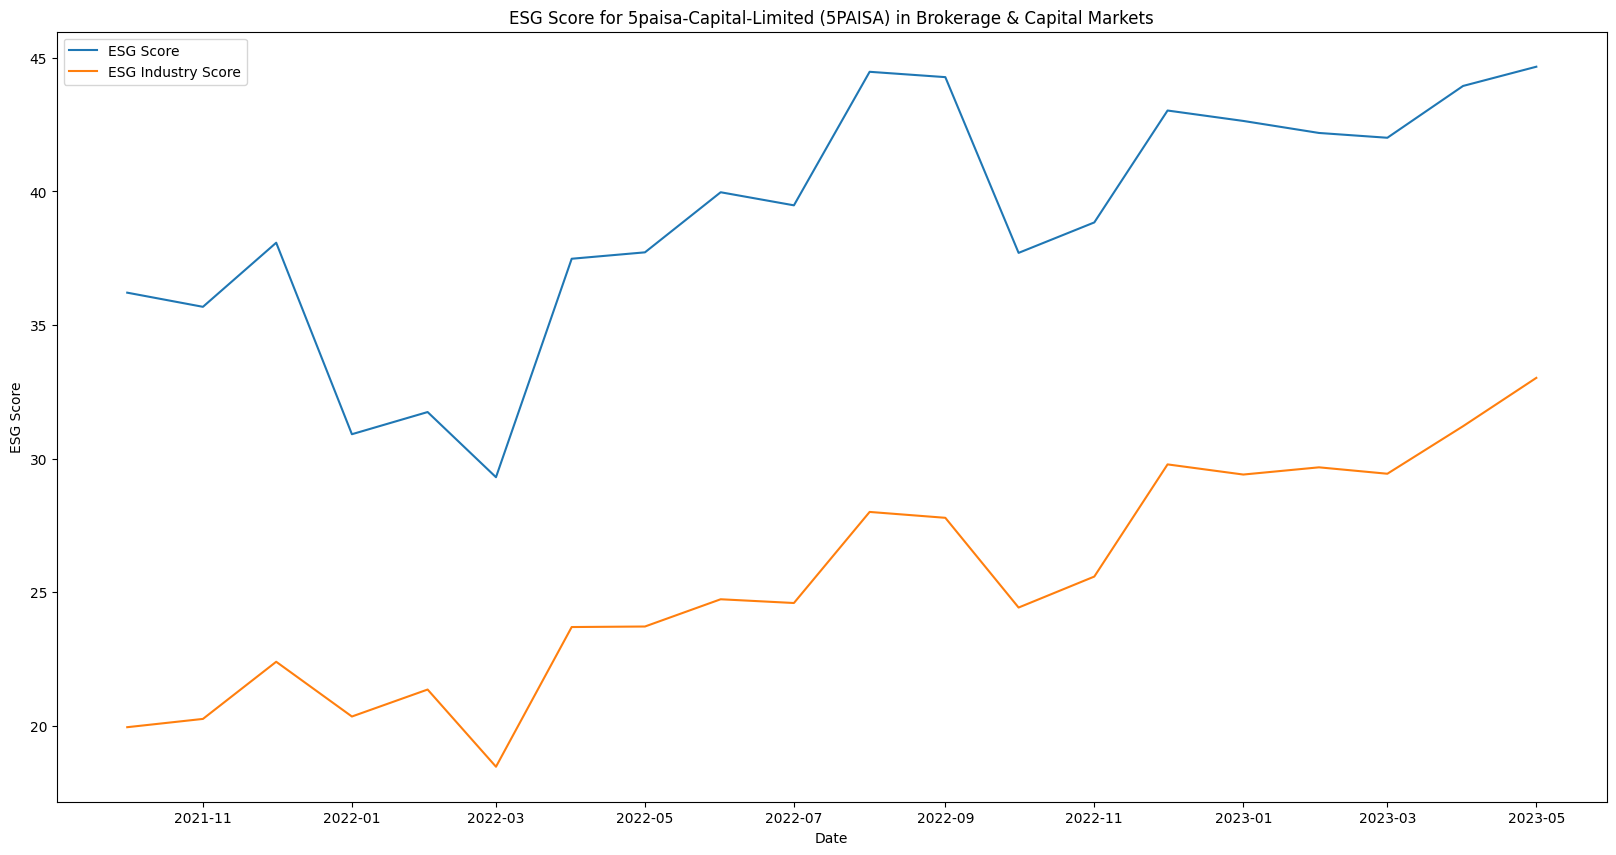

In [71]:
plot_esg(esg, esg_industry, stock_name, ticker, industry)

In [72]:
# Calculate the growth rate of the ESG score

def get_growth_rate(esg: list) -> float:
    esg = np.array(esg)
    xEsg = pd.to_datetime(esg[:, 0])
    yEsg = esg[:, 1].astype(float)

    if len(xEsg) < 2:
        return 'NAN'
    
    return (yEsg[-1] - yEsg[0]) / (xEsg[-1] - xEsg[0]).days

def df_growth_rate(df: pd.DataFrame, col = 'esg') -> float:
    growth_rates = []
    nan_gr_idx = []
    for i in range(len(df)):
        esg = df.at[i, col]
        rate = get_growth_rate(esg)
        if rate != 'NAN':
            growth_rates.append(rate)
        else:
            growth_rates.append(0)
            nan_gr_idx.append(i)
    return growth_rates, nan_gr_idx


In [73]:
df['growth_rate'], nan_gr_idx = df_growth_rate(df)
df['industry_growth_rate'], _ = df_growth_rate(df, col='esg_industry')
df = df.drop(nan_gr_idx)
df = df.reset_index(drop=True)
df.head()

,esg,esg_industry,industry,name,ticker,growth_rate,industry_growth_rate,mean_esg,industry_mean_esg
0,"[[2021-06-01, 14.44], [2021-07-01, 14.46], [20...","[[2021-06-01, 13.83], [2021-07-01, 12.9], [202...",Containers & Packaging Manufacturing,3M-INDIA-LIMITED,3MINDIA,0.099041,0.086152,56.030000,48.452917
1,"[[2021-10-01, 36.21], [2021-11-01, 35.68], [20...","[[2021-10-01, 19.94], [2021-11-01, 20.25], [20...",Brokerage & Capital Markets,5paisa-Capital-Limited,5PAISA,0.014662,0.022669,39.018000,25.387000
2,"[[2021-06-01, 16.98], [2021-07-01, 17.08], [20...","[[2021-06-01, 26.05], [2021-07-01, 26.42], [20...",Health Care & Pharmaceuticals,Aarti-Drugs-Ltd,AARTIDRUGS,0.005351,0.000515,21.845417,31.795833
3,"[[2021-06-01, 19.55], [2021-07-01, 19.69], [20...","[[2021-06-01, 28.24], [2021-07-01, 26.97], [20...","Chemicals, Plastics & Rubber Products Mfg.",AARTI-INDUSTRIES-LTD,AARTIIND,0.087353,0.071860,53.713333,55.423333
4,"[[2021-07-01, 52.96], [2021-08-01, 69.18], [20...","[[2021-07-01, 66.0], [2021-08-01, 73.21], [202...",Real Estate Financial Services,Aavas-Financiers-Ltd,AAVAS,0.041674,0.034469,70.727826,76.606522


In [74]:
(df['growth_rate'] > df['industry_growth_rate']).sum()

333

In [75]:
df['growth_rate'].describe()

count    593.000000
mean       0.008875
std        0.057012
min       -0.287689
25%       -0.014333
50%        0.009055
75%        0.035658
max        0.498989
Name: growth_rate, dtype: float64

In [76]:
df['industry_growth_rate'].describe()

count    593.000000
mean       0.007413
std        0.056472
min       -0.272925
25%       -0.014333
50%        0.009611
75%        0.032389
max        0.431685
Name: industry_growth_rate, dtype: float64

In [77]:
# Simple Mean of ESG Score
def mean_esg(esg: list) -> float:
    esg = np.array(esg)
    yEsg = esg[:, 1].astype(float)
    return yEsg.mean()

def df_mean_esg(df: pd.DataFrame, col = 'esg', mean_func = mean_esg) -> float:
    mean_esgs = []
    for i in range(len(df)):
        esg = df.at[i, col]
        mean_esgs.append(mean_func(esg))
    return mean_esgs

In [78]:
df['mean_esg'] = df_mean_esg(df)
df['industry_mean_esg'] = df_mean_esg(df, col='esg_industry')
df.head()


,esg,esg_industry,industry,name,ticker,growth_rate,industry_growth_rate,mean_esg,industry_mean_esg
0,"[[2021-06-01, 14.44], [2021-07-01, 14.46], [20...","[[2021-06-01, 13.83], [2021-07-01, 12.9], [202...",Containers & Packaging Manufacturing,3M-INDIA-LIMITED,3MINDIA,0.099041,0.086152,56.030000,48.452917
1,"[[2021-10-01, 36.21], [2021-11-01, 35.68], [20...","[[2021-10-01, 19.94], [2021-11-01, 20.25], [20...",Brokerage & Capital Markets,5paisa-Capital-Limited,5PAISA,0.014662,0.022669,39.018000,25.387000
2,"[[2021-06-01, 16.98], [2021-07-01, 17.08], [20...","[[2021-06-01, 26.05], [2021-07-01, 26.42], [20...",Health Care & Pharmaceuticals,Aarti-Drugs-Ltd,AARTIDRUGS,0.005351,0.000515,21.845417,31.795833
3,"[[2021-06-01, 19.55], [2021-07-01, 19.69], [20...","[[2021-06-01, 28.24], [2021-07-01, 26.97], [20...","Chemicals, Plastics & Rubber Products Mfg.",AARTI-INDUSTRIES-LTD,AARTIIND,0.087353,0.071860,53.713333,55.423333
4,"[[2021-07-01, 52.96], [2021-08-01, 69.18], [20...","[[2021-07-01, 66.0], [2021-08-01, 73.21], [202...",Real Estate Financial Services,Aavas-Financiers-Ltd,AAVAS,0.041674,0.034469,70.727826,76.606522


In [79]:
df['mean_esg'].describe()

count    593.000000
mean      54.017175
std       24.443250
min        0.220000
25%       34.911250
50%       56.179333
75%       73.402500
max       99.885000
Name: mean_esg, dtype: float64

In [80]:
df['industry_mean_esg'].describe()

count    593.000000
mean      52.695746
std       24.125289
min        0.000000
25%       34.469600
50%       54.125000
75%       71.873750
max      100.000000
Name: industry_mean_esg, dtype: float64

In [81]:
(df['mean_esg'] > df['industry_mean_esg']).sum()

317

In [82]:
((df['mean_esg'] > df['industry_mean_esg']) * (df['growth_rate'] > df['industry_growth_rate'])).sum()

170

<Axes: ylabel='Frequency'>

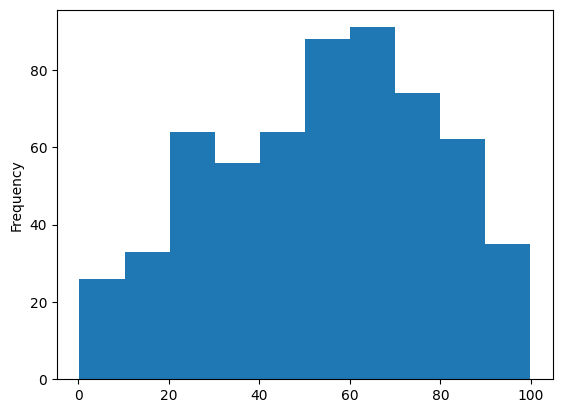

In [83]:
df['mean_esg'].plot.hist()

In [84]:
#unique industries
industries = list(set(df['industry']))
industries

# Mean ESG Score for each industry
mean_esg_industry = {}
for industry in industries:
    mean_esg_industry[industry] = df[df['industry'] == industry]['mean_esg'].mean()

mean_esg_industry = np.array(list(mean_esg_industry.items()))
mean_esg_industry_values = mean_esg_industry[:, 1].astype(float)
print(mean_esg_industry_values.mean(), mean_esg_industry_values.std(), mean_esg_industry_values.min(), mean_esg_industry_values.max(), mean_esg_industry_values.shape, np.quantile(mean_esg_industry_values, 0.25), np.quantile(mean_esg_industry_values, 0.5) ,np.quantile(mean_esg_industry_values, 0.75))

57.65157724000381 17.227636075748947 20.54125 95.9148 (107,) 47.56495857843137 56.61226078431372 69.57835416666666


In [85]:
industries

['Banking, Commercial Banking, Diversified Financial Services',
 'Medical & Diagnostic Laboratories',
 'Trains, Trucks, Buses & Storage',
 'Specialty Retail',
 'Water, Sewage & Other Systems',
 'Electrical Equipment Manufacturing',
 'Heavy & Civil Engineering Construction, Electric & Gas Utilities',
 'Air Freight, Couriers & Moving Companies',
 'Petroleum Refineries',
 "Lumber & Other Const. Mat'ls Wholesalers",
 'Mining (except Oil & Gas)',
 'Insurance Carriers',
 'Manufacturing',
 'Energy Equipment & Services',
 'Natural Gas Distribution',
 'Diversified Financial Services, Banking',
 'Motor Vehicle Manufacturing',
 'Heavy & Civil Engineering Construction',
 'Health Care & Pharmaceuticals',
 'Pharmaceutical & Medicine Manufacturing',
 'Luxury Goods & Cosmetics Manufacturing',
 'Water Transportation',
 'Conglomerates, Tobacco, Hotels, Motels & Restaurants',
 'Real Estate Management & Development',
 'Mining, Quarrying, & Oil & Gas Extraction',
 'Diversified Financial Services, Brokerage

In [86]:

# Pick top 400 stocks on the basis on mean_esg score
top_stocks = df.sort_values(by=['mean_esg'], ascending=False).head(400)
top_stocks.head()

,esg,esg_industry,industry,name,ticker,growth_rate,industry_growth_rate,mean_esg,industry_mean_esg
422,"[[2023-04-01, 99.89], [2023-05-01, 99.88]]","[[2023-04-01, 100.0], [2023-05-01, 100.0]]",Health Care & Pharmaceuticals,Neuland-Laboratories-Ltd,NEULANDLAB,-0.000333,0.000000,99.88500,100.0000
545,"[[2022-10-01, 99.73], [2022-11-01, 99.73], [20...","[[2022-10-01, 99.74], [2022-11-01, 99.74], [20...","Chemicals, Plastics & Rubber Products Mfg.",Styrenix-Performance-Materials-Ltd,STYRENIX,-0.000425,0.000094,99.65625,99.7975
258,"[[2021-05-01, 99.43], [2021-06-01, 98.9], [202...","[[2021-05-01, 99.71], [2021-06-01, 99.77], [20...",Mining (except Oil & Gas),HINDUSTAN-ZINC-LTD,HINDZINC,0.000233,0.000397,99.29760,99.8084
12,"[[2021-05-01, 97.15], [2021-06-01, 95.61], [20...","[[2021-05-01, 96.37], [2021-06-01, 95.96], [20...",Retail,Aditya-Birla-Fashion-and-Retail-Ltd,ABFRL,0.003164,0.004973,98.76040,98.9912
353,"[[2023-01-01, 98.09], [2023-02-01, 98.32], [20...","[[2023-01-01, 98.22], [2023-02-01, 98.22], [20...",Machinery Manufacturing,Kirloskar-Brothers-Ltd,KIRLOSBROS,0.001500,0.003417,98.17400,98.3860


In [87]:
# For each industry, pick the top 4 stocks on the basis of mean_esg score
top_stocks_industry = {}
for industry in industries:
    top_stocks_industry[industry] = df[df['industry'] == industry].sort_values(by=['mean_esg'], ascending=False).head(4)

# Store the intersection of top_stocks and top_stocks_industry
top_stocks_industry = pd.concat(top_stocks_industry.values())
merged = top_stocks[top_stocks['ticker'].isin(top_stocks_industry['ticker'])]
print(merged.shape, merged['industry'].value_counts())
merged.head()

(227, 9) industry
Health Care & Pharmaceuticals                                          4
Brokerage & Capital Markets                                            4
Consumer Lending                                                       4
Pharmaceutical & Medicine Manufacturing                                4
Motor Vehicle Manufacturing                                            4
                                                                      ..
Electric & Gas Utilities, Energy Equipment & Services                  1
Electronic Equipment & Instrumentation, Energy Equipment & Services    1
Diversified Financial Services, Banking                                1
Conglomerates, Heavy & Civil Engineering Construction                  1
Accounting, Tax Prep., & Payroll Services                              1
Name: count, Length: 97, dtype: int64


,esg,esg_industry,industry,name,ticker,growth_rate,industry_growth_rate,mean_esg,industry_mean_esg
422,"[[2023-04-01, 99.89], [2023-05-01, 99.88]]","[[2023-04-01, 100.0], [2023-05-01, 100.0]]",Health Care & Pharmaceuticals,Neuland-Laboratories-Ltd,NEULANDLAB,-0.000333,0.000000,99.88500,100.0000
545,"[[2022-10-01, 99.73], [2022-11-01, 99.73], [20...","[[2022-10-01, 99.74], [2022-11-01, 99.74], [20...","Chemicals, Plastics & Rubber Products Mfg.",Styrenix-Performance-Materials-Ltd,STYRENIX,-0.000425,0.000094,99.65625,99.7975
258,"[[2021-05-01, 99.43], [2021-06-01, 98.9], [202...","[[2021-05-01, 99.71], [2021-06-01, 99.77], [20...",Mining (except Oil & Gas),HINDUSTAN-ZINC-LTD,HINDZINC,0.000233,0.000397,99.29760,99.8084
12,"[[2021-05-01, 97.15], [2021-06-01, 95.61], [20...","[[2021-05-01, 96.37], [2021-06-01, 95.96], [20...",Retail,Aditya-Birla-Fashion-and-Retail-Ltd,ABFRL,0.003164,0.004973,98.76040,98.9912
353,"[[2023-01-01, 98.09], [2023-02-01, 98.32], [20...","[[2023-01-01, 98.22], [2023-02-01, 98.22], [20...",Machinery Manufacturing,Kirloskar-Brothers-Ltd,KIRLOSBROS,0.001500,0.003417,98.17400,98.3860


In [88]:
merged = merged.reset_index(drop=True)
merged.head()

,esg,esg_industry,industry,name,ticker,growth_rate,industry_growth_rate,mean_esg,industry_mean_esg
0,"[[2023-04-01, 99.89], [2023-05-01, 99.88]]","[[2023-04-01, 100.0], [2023-05-01, 100.0]]",Health Care & Pharmaceuticals,Neuland-Laboratories-Ltd,NEULANDLAB,-0.000333,0.000000,99.88500,100.0000
1,"[[2022-10-01, 99.73], [2022-11-01, 99.73], [20...","[[2022-10-01, 99.74], [2022-11-01, 99.74], [20...","Chemicals, Plastics & Rubber Products Mfg.",Styrenix-Performance-Materials-Ltd,STYRENIX,-0.000425,0.000094,99.65625,99.7975
2,"[[2021-05-01, 99.43], [2021-06-01, 98.9], [202...","[[2021-05-01, 99.71], [2021-06-01, 99.77], [20...",Mining (except Oil & Gas),HINDUSTAN-ZINC-LTD,HINDZINC,0.000233,0.000397,99.29760,99.8084
3,"[[2021-05-01, 97.15], [2021-06-01, 95.61], [20...","[[2021-05-01, 96.37], [2021-06-01, 95.96], [20...",Retail,Aditya-Birla-Fashion-and-Retail-Ltd,ABFRL,0.003164,0.004973,98.76040,98.9912
4,"[[2023-01-01, 98.09], [2023-02-01, 98.32], [20...","[[2023-01-01, 98.22], [2023-02-01, 98.22], [20...",Machinery Manufacturing,Kirloskar-Brothers-Ltd,KIRLOSBROS,0.001500,0.003417,98.17400,98.3860


In [89]:
merged.shape

(227, 9)

In [109]:
industryAndEsgAndStocks = {}

for industry in merged['industry'].unique():
    industryAndEsgAndStocks[industry] = {}
    industryAndEsgAndStocks[industry]['mean_esg'] = merged[merged['industry'] == industry]['mean_esg'].mean()
    industryAndEsgAndStocks[industry]['stocks'] = merged[merged['industry'] == industry]['ticker'].values
    industryAndEsgAndStocks[industry]['esg'] = merged[merged['industry'] == industry]['mean_esg'].values
    if len(industryAndEsgAndStocks[industry]['stocks']) is not len(industryAndEsgAndStocks[industry]['esg']):
        print('Error' + industry)

# sort the industries on the basis of mean_esg
industryAndEsgAndStocks = dict(sorted(industryAndEsgAndStocks.items(), key=lambda item: item[1]['mean_esg'], reverse=True))
# print nicely to a file
with open('industryAndEsgAndStocks.md', 'w') as f:
    f.write("# Industries and Stock ESG ratings\n\n")
    for industry in industryAndEsgAndStocks:
        f.write(f'## {industry} \n### {industryAndEsgAndStocks[industry]["mean_esg"]}\n')
        for i in range(len(industryAndEsgAndStocks[industry]['stocks'])):
            if len(industryAndEsgAndStocks[industry]['stocks']) == len(industryAndEsgAndStocks[industry]['esg']):
              f.write(f"- {industryAndEsgAndStocks[industry]['stocks'][i]} {industryAndEsgAndStocks[industry]['esg'][i]}\n")
            else:
              f.write(f"- {industryAndEsgAndStocks[industry]['stocks'][i]}\n")
        f.write('\n')


In [95]:
nse_data_caps = pd.read_excel('MCAP31032023_0.xlsx', index_col=0)
nse_data_caps.head()

c:\Users\aman2\Documents\BTProject\btp\env\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\aman2\Documents\BTProject\btp\env\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


,Symbol,Company Name,"Market capitalization as on March 31, 2023\n(Rs in Lakhs)",Unnamed: 4
Sr. No.,,,,
1,RELIANCE,Reliance Industries Limited,157706937.768198,LARGECAP
2,TCS,Tata Consultancy Services Limited,117305527.967007,LARGECAP
3,HDFCBANK,HDFC Bank Limited,89808750.012063,LARGECAP
4,ICICIBANK,ICICI Bank Limited,61248250.447697,LARGECAP
5,HINDUNILVR,Hindustan Unilever Limited,60157759.876617,LARGECAP


In [97]:
nse_data_caps['CAP'] = nse_data_caps['Unnamed: 4']
nse_data_caps = nse_data_caps.drop(['Unnamed: 4'], axis=1)

In [98]:
nse_data_caps.head()

,Symbol,Company Name,"Market capitalization as on March 31, 2023\n(Rs in Lakhs)",CAP
Sr. No.,,,,
1,RELIANCE,Reliance Industries Limited,157706937.768198,LARGECAP
2,TCS,Tata Consultancy Services Limited,117305527.967007,LARGECAP
3,HDFCBANK,HDFC Bank Limited,89808750.012063,LARGECAP
4,ICICIBANK,ICICI Bank Limited,61248250.447697,LARGECAP
5,HINDUNILVR,Hindustan Unilever Limited,60157759.876617,LARGECAP


In [100]:
#check if all the stocks in the merged dataframe are in the nse_data_caps dataframe
merged[~merged['ticker'].isin(nse_data_caps['Symbol'])]

,esg,esg_industry,industry,name,ticker,growth_rate,industry_growth_rate,mean_esg,industry_mean_esg


In [101]:
# Add the market cap to the merged dataframe
merged = merged.merge(nse_data_caps, left_on='ticker', right_on='Symbol')

In [102]:
merged.head()

,esg,esg_industry,industry,name,ticker,growth_rate,industry_growth_rate,mean_esg,industry_mean_esg,Symbol,Company Name,"Market capitalization as on March 31, 2023\n(Rs in Lakhs)",CAP
0,"[[2023-04-01, 99.89], [2023-05-01, 99.88]]","[[2023-04-01, 100.0], [2023-05-01, 100.0]]",Health Care & Pharmaceuticals,Neuland-Laboratories-Ltd,NEULANDLAB,-0.000333,0.000000,99.88500,100.0000,NEULANDLAB,Neuland Laboratories Limited,231457.612504,SMALLCAP
1,"[[2022-10-01, 99.73], [2022-11-01, 99.73], [20...","[[2022-10-01, 99.74], [2022-11-01, 99.74], [20...","Chemicals, Plastics & Rubber Products Mfg.",Styrenix-Performance-Materials-Ltd,STYRENIX,-0.000425,0.000094,99.65625,99.7975,STYRENIX,Styrenix Performance Materials Limited,125789.975625,SMALLCAP
2,"[[2021-05-01, 99.43], [2021-06-01, 98.9], [202...","[[2021-05-01, 99.71], [2021-06-01, 99.77], [20...",Mining (except Oil & Gas),HINDUSTAN-ZINC-LTD,HINDZINC,0.000233,0.000397,99.29760,99.8084,HINDZINC,Hindustan Zinc Limited,12394973.2865,LARGECAP
3,"[[2021-05-01, 97.15], [2021-06-01, 95.61], [20...","[[2021-05-01, 96.37], [2021-06-01, 95.96], [20...",Retail,Aditya-Birla-Fashion-and-Retail-Ltd,ABFRL,0.003164,0.004973,98.76040,98.9912,ABFRL,Aditya Birla Fashion and Retail Limited,2033642.081795,LARGECAP
4,"[[2023-01-01, 98.09], [2023-02-01, 98.32], [20...","[[2023-01-01, 98.22], [2023-02-01, 98.22], [20...",Machinery Manufacturing,Kirloskar-Brothers-Ltd,KIRLOSBROS,0.001500,0.003417,98.17400,98.3860,KIRLOSBROS,Kirloskar Brothers Limited,325775.118915,SMALLCAP


<Axes: >

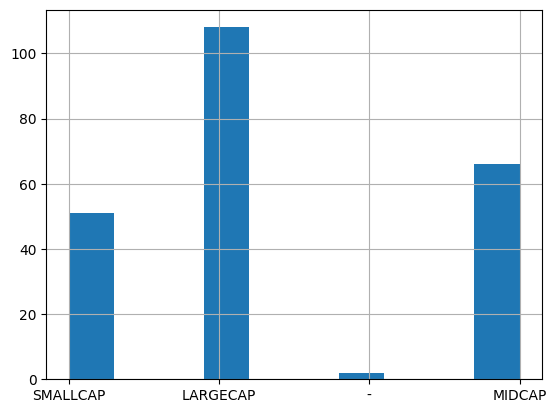

In [104]:
merged['CAP'].hist()

In [106]:
merged[merged['CAP'] == '-']

,esg,esg_industry,industry,name,ticker,growth_rate,industry_growth_rate,mean_esg,industry_mean_esg,Symbol,Company Name,"Market capitalization as on March 31, 2023\n(Rs in Lakhs)",CAP
10,"[[2022-12-01, 96.09], [2023-01-01, 96.2], [202...","[[2022-12-01, 91.01], [2023-01-01, 89.89], [20...",Construction,Punj-Lloyd-Ltd,PUNJLLOYD,0.002715,-0.005960,96.361667,90.363333,PUNJLLOYD,Punj Lloyd Limited,"*Not available for trading as on March 31, 2023",-
212,"[[2022-03-01, 40.68], [2022-04-01, 46.52], [20...","[[2022-03-01, 36.42], [2022-04-01, 41.95], [20...",Food Products,Manpasand-Beverages-Ltd,MANPASAND,0.020047,0.027723,49.927333,47.078667,MANPASAND,Manpasand Beverages Limited,"*Not available for trading as on March 31, 2023",-


In [107]:
merged = merged[merged['CAP'] != '-']
merged = merged.reset_index(drop=True)
merged.head()

,esg,esg_industry,industry,name,ticker,growth_rate,industry_growth_rate,mean_esg,industry_mean_esg,Symbol,Company Name,"Market capitalization as on March 31, 2023\n(Rs in Lakhs)",CAP
0,"[[2023-04-01, 99.89], [2023-05-01, 99.88]]","[[2023-04-01, 100.0], [2023-05-01, 100.0]]",Health Care & Pharmaceuticals,Neuland-Laboratories-Ltd,NEULANDLAB,-0.000333,0.000000,99.88500,100.0000,NEULANDLAB,Neuland Laboratories Limited,231457.612504,SMALLCAP
1,"[[2022-10-01, 99.73], [2022-11-01, 99.73], [20...","[[2022-10-01, 99.74], [2022-11-01, 99.74], [20...","Chemicals, Plastics & Rubber Products Mfg.",Styrenix-Performance-Materials-Ltd,STYRENIX,-0.000425,0.000094,99.65625,99.7975,STYRENIX,Styrenix Performance Materials Limited,125789.975625,SMALLCAP
2,"[[2021-05-01, 99.43], [2021-06-01, 98.9], [202...","[[2021-05-01, 99.71], [2021-06-01, 99.77], [20...",Mining (except Oil & Gas),HINDUSTAN-ZINC-LTD,HINDZINC,0.000233,0.000397,99.29760,99.8084,HINDZINC,Hindustan Zinc Limited,12394973.2865,LARGECAP
3,"[[2021-05-01, 97.15], [2021-06-01, 95.61], [20...","[[2021-05-01, 96.37], [2021-06-01, 95.96], [20...",Retail,Aditya-Birla-Fashion-and-Retail-Ltd,ABFRL,0.003164,0.004973,98.76040,98.9912,ABFRL,Aditya Birla Fashion and Retail Limited,2033642.081795,LARGECAP
4,"[[2023-01-01, 98.09], [2023-02-01, 98.32], [20...","[[2023-01-01, 98.22], [2023-02-01, 98.22], [20...",Machinery Manufacturing,Kirloskar-Brothers-Ltd,KIRLOSBROS,0.001500,0.003417,98.17400,98.3860,KIRLOSBROS,Kirloskar Brothers Limited,325775.118915,SMALLCAP


In [108]:
len(merged)

225

In [110]:
# PLAN - 50 % Large Cap, 30 % Mid Cap, 20 % Small Cap
total_stocks = 40
large_cap = 20
mid_cap = 12
small_cap = 8

In [114]:
greater_than_ind = merged[(merged['growth_rate'] > merged['industry_growth_rate'])]

In [115]:
greater_than_ind.shape

(117, 13)

In [119]:
greater_than_ind = greater_than_ind.reset_index(drop=True)

In [121]:
(greater_than_ind['CAP'] == 'LARGECAP').sum()

55

In [122]:
(greater_than_ind['CAP'] == 'MIDCAP').sum()

40

In [123]:
(greater_than_ind['CAP'] == 'SMALLCAP').sum()

22

In [134]:
greater_than_ind[(greater_than_ind['CAP'] == 'SMALLCAP')]['ticker']

12            HIL
13     INDIAGLYCO
17      EDELWEISS
19        CSBBANK
31      MOLDTKPAC
32     TATAMETALI
34        ROSSARI
45      MAYURUNIQ
47           PDSL
50            PTC
62           RUPA
66         ARVIND
68     RELCAPITAL
83           RHFL
89       SHANKARA
90         GVKPIL
96          GET&D
97     BALMLAWRIE
98     JISLJALEQS
100    MCLEODRUSS
105     GICHSGFIN
116     TEAMLEASE
Name: ticker, dtype: object

In [144]:
large_stocks = greater_than_ind[(greater_than_ind['CAP'] == 'LARGECAP')].head(20)

In [145]:
small_stocks = greater_than_ind[(greater_than_ind['CAP'] == 'SMALLCAP')].head(8)

In [146]:
mid_stocks = greater_than_ind[(greater_than_ind['CAP'] == 'MIDCAP')].head(12)

In [154]:
# combine the stocks
stocks = pd.concat([large_stocks, mid_stocks, small_stocks])
stocks = stocks.reset_index(drop=True)
stocks.head()

,esg,esg_industry,industry,name,ticker,growth_rate,industry_growth_rate,mean_esg,industry_mean_esg,Symbol,Company Name,"Market capitalization as on March 31, 2023\n(Rs in Lakhs)",CAP
0,"[[2021-05-01, 93.24], [2021-06-01, 95.96], [20...","[[2021-05-01, 93.24], [2021-06-01, 90.67], [20...",Commercial Banking,IndusInd-Bank-Limited,INDUSINDBK,0.007027,0.003603,97.9748,95.9528,INDUSINDBK,IndusInd Bank Limited,8285787.877861,LARGECAP
1,"[[2021-05-01, 98.4], [2021-06-01, 87.67], [202...","[[2021-05-01, 99.16], [2021-06-01, 90.52], [20...","Chemicals, Plastics & Rubber Products Mfg.",Tata-Chemicals-Ltd,TATACHEM,0.000740,0.000315,97.7936,98.7192,TATACHEM,Tata Chemicals Limited,2477377.425411,LARGECAP
2,"[[2021-05-01, 98.83], [2021-06-01, 97.0], [202...","[[2021-05-01, 99.52], [2021-06-01, 98.11], [20...","Electronic Equipment & Instrumentation, Energy...",ABB-in-India,ABB,-0.006452,-0.007301,95.9148,96.4656,ABB,ABB India Limited,7131034.681312,LARGECAP
3,"[[2021-05-01, 78.59], [2021-06-01, 85.23], [20...","[[2021-05-01, 80.99], [2021-06-01, 79.17], [20...",Banking,HDFC-Bank-Ltd,HDFCBANK,0.026986,0.020671,94.2548,91.2924,HDFCBANK,HDFC Bank Limited,89808750.012063,LARGECAP
4,"[[2021-05-01, 92.5], [2021-06-01, 84.27], [202...","[[2021-05-01, 93.09], [2021-06-01, 89.59], [20...",Construction Materials,Dalmia-Bharat-Ltd,DALBHARAT,0.009301,0.008575,93.7156,95.6384,DALBHARAT,Dalmia Bharat Limited,3690082.205382,LARGECAP


In [157]:
stocks = stocks.sort_values(by=['mean_esg'], ascending=False)
stocks = stocks.reset_index(drop=True)

In [156]:
stocks.to_csv('stocks.csv')